In [1]:
# Check tensorflow version and GPU availability
import tensorflow as tf
print('tf version:', tf.__version__)
print('gpu:', tf.config.list_physical_devices('GPU'))

tf version: 2.6.0
gpu: []


In [2]:
!pip install opencv-python

In [3]:
import cv2

In [4]:
IMG_DIMEN = 224  
N_COLORS = 3    

In [5]:
from tqdm import tqdm
import numpy as np
import os

def read_data(dir_path):
    X = []
    y = []
    y_map = {'no_tumor': 0, 'yes_tumor': 1}
    for class_name in y_map.keys():
        subdir_path = os.path.join(dir_path, class_name)
        filenames = os.listdir(subdir_path)
        for fname in tqdm(filenames):
            if fname.endswith('.jpg'):
                img_path = os.path.join(subdir_path, fname)
                img = cv2.imread(img_path)
                img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
                X.append(img)
                y.append(y_map[class_name])
    X = np.vstack(X).astype('float32')/255.0
    y = np.array(y).astype('int32')
    return X, y

In [6]:
X,y = read_data('data/Training')

100%|██████████| 450/450 [00:01<00:00, 255.86it/s]


In [7]:
print(X.shape)
print(y.shape)

(557, 224, 224, 3)
(557,)


In [8]:
X_test, y_test = read_data('data/Testing')

100%|██████████| 113/113 [00:00<00:00, 263.57it/s]


In [9]:
print(X_test.shape)
print(y_test.shape)

(149, 224, 224, 3)
(149,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=0)

In [11]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_val.shape)
print(y_val.shape)

(373, 224, 224, 3)
(373,)
--------------
(184, 224, 224, 3)
(184,)


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

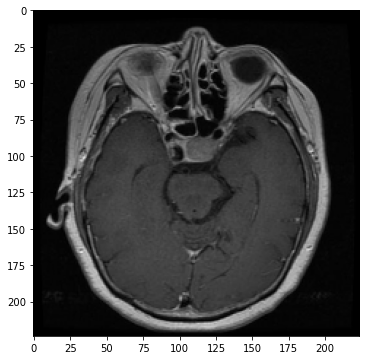

In [13]:
imshow(X_train[3])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [15]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor='val_loss', mode='min', 
    save_weights_only=True, save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=120,
    callbacks=[checkpoint]
)

Epoch 1/120
12/12 [==============================] - 114s 9s/step - loss: 0.6273 - accuracy: 0.7453 - val_loss: 0.5524 - val_accuracy: 0.8098

Epoch 00001: val_loss improved from inf to 0.55241, saving model to saved-model\best-model
Epoch 2/120
12/12 [==============================] - 130s 11s/step - loss: 0.5531 - accuracy: 0.8070 - val_loss: 0.5424 - val_accuracy: 0.8098

Epoch 00002: val_loss improved from 0.55241 to 0.54242, saving model to saved-model\best-model
Epoch 3/120
12/12 [==============================] - 142s 12s/step - loss: 0.5625 - accuracy: 0.8070 - val_loss: 0.5357 - val_accuracy: 0.8098

Epoch 00003: val_loss improved from 0.54242 to 0.53572, saving model to saved-model\best-model
Epoch 4/120
12/12 [==============================] - 122s 10s/step - loss: 0.5439 - accuracy: 0.8070 - val_loss: 0.5542 - val_accuracy: 0.8098

Epoch 00004: val_loss did not improve from 0.53572
Epoch 5/120
12/12 [==============================] - 130s 11s/step - loss: 0.5585 - accuracy:


Epoch 00038: val_loss did not improve from 0.30192
Epoch 39/120
12/12 [==============================] - 110s 9s/step - loss: 0.3229 - accuracy: 0.8794 - val_loss: 0.3002 - val_accuracy: 0.8967

Epoch 00039: val_loss improved from 0.30192 to 0.30016, saving model to saved-model\best-model
Epoch 40/120
12/12 [==============================] - 110s 9s/step - loss: 0.3196 - accuracy: 0.8794 - val_loss: 0.3072 - val_accuracy: 0.8859

Epoch 00040: val_loss did not improve from 0.30016
Epoch 41/120
12/12 [==============================] - 110s 9s/step - loss: 0.3316 - accuracy: 0.8740 - val_loss: 0.3100 - val_accuracy: 0.8913

Epoch 00041: val_loss did not improve from 0.30016
Epoch 42/120
12/12 [==============================] - 110s 9s/step - loss: 0.3186 - accuracy: 0.8901 - val_loss: 0.3340 - val_accuracy: 0.8804

Epoch 00042: val_loss did not improve from 0.30016
Epoch 43/120
12/12 [==============================] - 110s 9s/step - loss: 0.3588 - accuracy: 0.8713 - val_loss: 0.2979 - va

12/12 [==============================] - 110s 9s/step - loss: 0.2007 - accuracy: 0.9196 - val_loss: 0.3078 - val_accuracy: 0.8967

Epoch 00079: val_loss did not improve from 0.26911
Epoch 80/120
12/12 [==============================] - 109s 9s/step - loss: 0.1993 - accuracy: 0.9115 - val_loss: 0.3406 - val_accuracy: 0.8967

Epoch 00080: val_loss did not improve from 0.26911
Epoch 81/120
12/12 [==============================] - 109s 9s/step - loss: 0.2252 - accuracy: 0.9115 - val_loss: 0.2840 - val_accuracy: 0.8967

Epoch 00081: val_loss did not improve from 0.26911
Epoch 82/120
12/12 [==============================] - 109s 9s/step - loss: 0.1849 - accuracy: 0.9196 - val_loss: 0.2949 - val_accuracy: 0.8804

Epoch 00082: val_loss did not improve from 0.26911
Epoch 83/120
12/12 [==============================] - 109s 9s/step - loss: 0.1752 - accuracy: 0.9249 - val_loss: 0.3026 - val_accuracy: 0.8967

Epoch 00083: val_loss did not improve from 0.26911
Epoch 84/120
12/12 [==================


Epoch 00120: val_loss improved from 0.24701 to 0.23552, saving model to saved-model\best-model


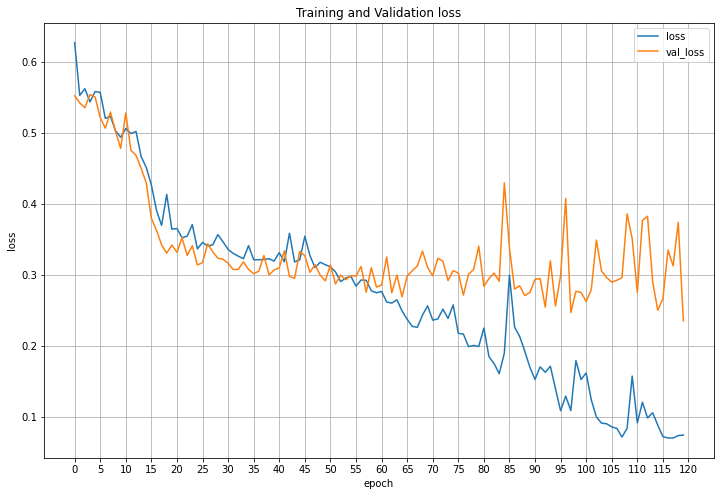

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.show()

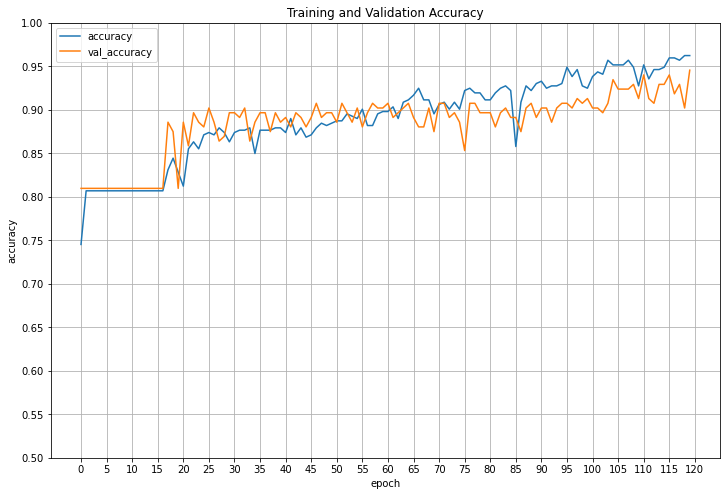

In [18]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [19]:
model.load_weights('saved-model/best-model')
model.evaluate(X_test, y_test)

5/5 [==============================] - 10s 2s/step - loss: 1.6609 - accuracy: 0.5302


[1.6608541011810303, 0.5302013158798218]